# 異なる条件の分布比較

### ライブラリの一括インポート

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import os
import re

import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata

from funcs.tse import get_ticker_name_list

### Matplotlib のフォント設定（オプション）

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()

## pickle データの読み込み

In [4]:
pattern = re.compile(r".+_(\d{8})\..+")

name_doe_1 = "doe-6"  # 実験計画名 (1)
name_doe_2 = "doe-6a"  # 実験計画名 (2)
name_code = "7011"  # 銘柄コード
name_param = "THRESHOLD_MR"

df_1 = pd.read_pickle(f"{name_doe_1}_{name_code}.pkl")
df_1[name_param] = 7
file_latest = sorted(list(df_1["file"]))[-1]
if m := pattern.match(file_latest):
    date_str = m.group(1)
else:
    date_str = "00000000"
print("date string :", date_str)

df_2 = pd.read_pickle(f"{name_doe_2}_{name_code}.pkl")
df_2[name_param] = 6

df = pd.concat([df_1, df_2])
df

date string : 20251219


,file,code,trade,PERIOD_MA_1,PERIOD_MA_2,total,THRESHOLD_MR
0,ticks_20250819.xlsx,7011,16,30,300,60.0,7
1,ticks_20250819.xlsx,7011,12,45,300,40.0,7
2,ticks_20250819.xlsx,7011,14,60,300,72.0,7
3,ticks_20250819.xlsx,7011,10,75,300,98.0,7
4,ticks_20250819.xlsx,7011,6,90,300,37.0,7
...,...,...,...,...,...,...,...
10159,ticks_20251219.xlsx,7011,6,120,900,83.0,6
10160,ticks_20251219.xlsx,7011,4,135,900,76.0,6
10161,ticks_20251219.xlsx,7011,6,150,900,63.0,6
10162,ticks_20251219.xlsx,7011,6,165,900,53.0,6


## 取引回数分布

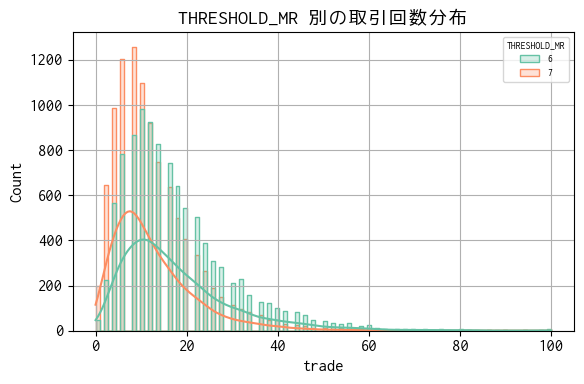

In [5]:
plt.rcParams["font.size"] = 12
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=df,
    x="trade",
    hue=name_param,
    kde=True,
    palette="Set2",
    element="step",
    line_kws={"linewidth": 1.5},
    ax=ax,
)

sns.move_legend(
    ax,
    "best",  # Adjust location as needed
    # bbox_to_anchor=(1, 1), # Optional: moves legend outside the plot area
    fontsize=7,
    title_fontsize=7,
)

ax.grid()
ax.set_title(f"{name_param} 別の取引回数分布")

plt.tight_layout()
output = os.path.join("..", "output", f"{date_str}_{name_code}_{name_param}_trade_hist.png")
plt.savefig(output)
plt.show()

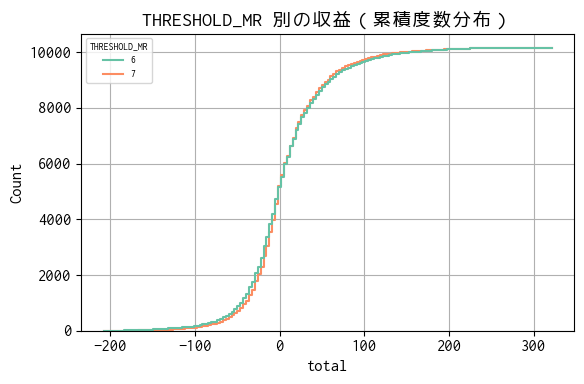

In [13]:
plt.rcParams["font.size"] = 12
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=df,
    x="total",
    hue=name_param,
    palette="Set2",
    log_scale=False, element="step", fill=False,
    cumulative=True, stat="count", common_norm=False,
    line_kws={"linewidth": 1},
    ax=ax,
)

sns.move_legend(
    ax,
    "best",  # Adjust location as needed
    # bbox_to_anchor=(1, 1), # Optional: moves legend outside the plot area
    fontsize=7,
    title_fontsize=7,
)

ax.grid()
ax.set_title(f"{name_param} 別の収益（累積度数分布）")

plt.tight_layout()
output = os.path.join("..", "output", f"{date_str}_{name_code}_{name_param}_total_cumulative.png")
plt.savefig(output)
plt.show()